In [1]:
%matplotlib inline
from matplotlib import pylab as plt
plt.style.use('ggplot')

from idrf import IDRF #Deconvolution routine

In [2]:
from obspy.clients.fdsn.client import Client

client = Client('IRIS')

network = 'IU'
station = 'PAYG'

inv = client.get_stations(network=network, station=station,level='response')

sta = inv[0][0]
sta

Station PAYG (Puerto Ayora, Galapagos Islands)
	Station Code: PAYG
	Channel Count: 93/93 (Selected/Total)
	1998-06-19T00:00:00.000000Z - 2009-08-09T00:00:00.000000Z
	Access: open 
	Latitude: -0.67, Longitude: -90.29, Elevation: 270.0 m
	Available Channels:
		PAYG..BC0, PAYG..BC1, PAYG..BCI, PAYG..BHZ, PAYG..BHN, PAYG..BHE, 
		PAYG..BH1, PAYG..BH2, PAYG..HHZ, PAYG..HHN, PAYG..HHE, PAYG..HH1, 
		PAYG..HH2, PAYG..HLZ, PAYG..HLN, PAYG..HLE, PAYG..LHZ, PAYG..LHN, 
		PAYG..LHE, PAYG..LH1, PAYG..LH2, PAYG..LLZ, PAYG..LLN, PAYG..LLE, 
		PAYG..SCI, PAYG..SHZ, PAYG..SHN, PAYG..SHE, PAYG..SH1, PAYG..SH2, 
		PAYG..UHZ, PAYG..UHN, PAYG..UHE, PAYG..UH1, PAYG..UH2, PAYG..VE1, 
		PAYG..VHZ, PAYG..VHN, PAYG..VHE, PAYG..VH1, PAYG..VH2, PAYG..VK1, 
		PAYG.00.BHZ, PAYG.00.BH1, PAYG.00.BH2, PAYG.00.LDO, PAYG.00.LHZ, 
		PAYG.00.LH1, PAYG.00.LH2, PAYG.00.UHZ, PAYG.00.UH1, PAYG.00.UH2, 
		PAYG.00.VE1, PAYG.00.VHZ, PAYG.00.VH1, PAYG.00.VH2, PAYG.00.VK1, 
		PAYG.10.BHZ (2x), PAYG.10.BHN, PAYG.10.BHE, PAYG.10.BH

In [4]:
import wget

!rm *.ndk

years = range(6,18)
months  = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
for year in years:
    for month in months:
        url='http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/20%02d/%s%02d.ndk' % (year, month, year)
        print(url)
        wget.download( url )

http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/jan06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/feb06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/mar06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/apr06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/may06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/jun06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/jul06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/aug06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/sep06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/oct06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/nov06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/dec06.ndk
http

http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/apr14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/may14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/jun14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/jul14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/aug14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/sep14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/oct14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/nov14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/dec14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2015/jan15.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2015/feb15.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2015/mar15.ndk
http

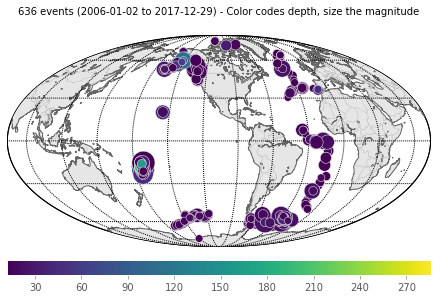

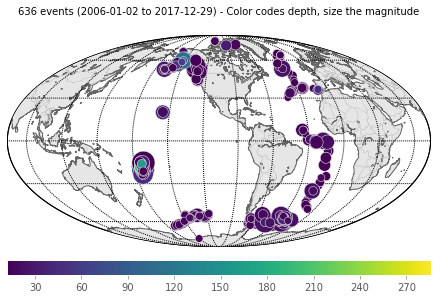

In [5]:
import obspy
from obspy.geodetics.base import gps2dist_azimuth
from obspy.clients.syngine import Client
from obspy.taup import TauPyModel

cat = obspy.core.event.Catalog()

for year in years:
    for month in months:
        tmp = obspy.read_events('%s%02d.ndk' % (month, year))
        cat = cat + tmp.filter('magnitude >= 5.5')
    
    
cat2 = obspy.core.event.Catalog()

for evt in cat:
    elat=evt.origins[0].latitude
    elon=evt.origins[0].longitude
    slat=sta.latitude
    slon=sta.longitude
    delm, az, baz = gps2dist_azimuth(elat, elon, slat, slon)
    deldeg=delm/1000/111.11
    if deldeg > 55 and deldeg < 85:
        cat2.append(evt)
        
cat2.plot()
    

In [6]:
from scipy.signal import tukey
from numpy import arange, linspace, zeros
from numpy.random import randn
from numpy import argmax, nan
import warnings
warnings.filterwarnings('ignore')

model = TauPyModel(model="iasp91")

#tries = linspace(0.5, 0.90, 5)
pctage=0.80

#tshifts = [-6, -3, 0, 3, 6]
tshifts = [0]

rbin    = zeros(len(tshifts)*len(cat2)*700).reshape(len(tshifts),len(cat2),700) * nan
rbin_s  = rbin.copy()
mbin1   = zeros(len(tshifts)*len(cat2)).reshape(len(tshifts),len(cat2)) * nan
mbin1_s = mbin1.copy()
mbin2   = mbin1.copy()
mbin2_s = mbin1.copy()

for ievt in range(len(cat2)):
    print('Working on %5d of %5d' % (ievt+1,len(cat2)))

    strike=cat2[ievt].focal_mechanisms[0].nodal_planes.nodal_plane_1.strike
    dip=cat2[ievt].focal_mechanisms[0].nodal_planes.nodal_plane_1.dip
    rake=cat2[ievt].focal_mechanisms[0].nodal_planes.nodal_plane_1.rake

    quake_depth_in_km=cat2[ievt].preferred_origin().depth/1000.0
    
    etime = cat2[ievt].preferred_origin().time

    slat=sta.latitude
    slon=sta.longitude
    elat=cat2[ievt].preferred_origin().latitude
    elon=cat2[ievt].preferred_origin().longitude

    client_syn = Client()
    
    t1=etime
    t2=etime+3600./2.

    for wvfrm_type in ['data','synthetic']:
    
        if wvfrm_type == 'synthetic':
            tmpstr = '%8.1f %8.1f %6.1f %8.1f %8.1f %8.2f %8.2f %8.2f ' % (elat, elon, quake_depth_in_km, slat, slon, strike, dip, rake)
            print(tmpstr)
            stis = client_syn.get_waveforms(model="iasp91_2s",
                                              sourcelatitude=elat,
                                              sourcelongitude=elon,
                                              sourcedepthinmeters=1000.*quake_depth_in_km,
                                              receiverlatitude=slat, receiverlongitude=slon,
                                              sourcedoublecouple=[strike,dip,rake],
                                              origintime=etime,
                                              units='velocity', starttime=t1, endtime=t2)
        else:
            #
            try:
                stis=client.get_waveforms(network,station,'10','LH?',t1,t2,attach_response=True)
                pre_filt = (0.005, 0.01, 5.0, 10.0)
                stis.remove_response(output='VEL', pre_filt=pre_filt)
            except:
                print('  get_waveforms failed.')
                break


            #


        print(stis)

        #print('...strike, dip, rake, elat, elon, quake_depth_in_km = %3d %3d %3d %5d %5d %5d %5d' % (strike, dip, rake, elat, elon, slat, quake_depth_in_km))


        delm, az, baz = gps2dist_azimuth(elat, elon, slat, slon)
        deldeg=delm/1000/111.11

        arrivals = model.get_travel_times(source_depth_in_km=quake_depth_in_km, distance_in_degree=deldeg,phase_list=['S'])

        try:
            stis.rotate('->ZNE',inventory=inv)
            #stis.rotate('NE->RT', back_azimuth = baz)
            stis.rotate('ZNE->LQT', inclination=arrivals[0].incident_angle, back_azimuth = baz)
            stis.detrend()
        except ValueError as e:
            print('Error: %s' % e)
            break

        stis.filter('bandpass', freqmin = 1./100., freqmax = 1./8., zerophase=True)
        #stis.filter('highpass', freq=1./20., zerophase=True)
        stis.resample(5)
        stis.differentiate()

        t1=etime+arrivals[0].time - 50
        t2=etime+arrivals[0].time + 50

        for ii, tshift in enumerate(tshifts):

            
            stis2=stis.copy().trim(t1+tshift,t2+tshift)
            
            try:
                dt = stis2[0].stats.delta
            except IndexError as e:
                print(e)
                break
                
            assert 'L' in stis2[0].stats.channel
            assert 'Q' in stis2[1].stats.channel
            #assert 'T' in stis2[2].stats.channel
            
            

            P = stis2[1].copy().data
            D = stis2[0].copy().data

            #Indeces to mask out
            i1 = int(len(P) * (pctage)/2)
            i2 = int(len(P) - i1)
            
            N1=P.copy()[:i1]
            N2=D.copy()[:i1]

            P[:i1]=0.0
            P[i2:]=0.0
            P[i1:i2]= P[i1:i2] * tukey(len(P[i1:i2]))

            smax  = max(abs(P))
            nmax1 = max(abs(N1))
            nmax2 = max(abs(N2))
            #print(i1,i2,imax)
            
            TB = 1.5
            NT = 2

            Poverlap = 0.99
            win_len  = 100

            #times, RF = ETMTM(P,D,TB,NT,dt, tag='data', nalphas=20, Poverlap=0.99, win_len=70)
            #times, RF = ETMTM(P,D,TB,NT,dt, tag='data', nalphas=20, Poverlap=Poverlap, win_len=win_len)
            
            times, RF     = IDRF(P,D,dt)
            _,     RFnorm = IDRF(P,D,dt)
            
            #_, RFnorm = ETMTM(P,P,TB,NT,dt, tag='data', nalphas=20, Poverlap=Poverlap, win_len=win_len)

            if wvfrm_type == 'synthetic':
                rbin_s[ii,ievt,:len(RF)] = RF / max(abs(RFnorm))
                mbin1_s[ii,ievt] = smax/nmax1
                mbin2_s[ii,ievt] = smax/nmax2
            else:
                rbin[ii,ievt,:len(RF)] = RF / max(abs(RFnorm))
                mbin1[ii,ievt] = smax/nmax1
                mbin2[ii,ievt] = smax/nmax2
        

Working on     1 of   636
  get_waveforms failed.
Working on     2 of   636
  get_waveforms failed.
Working on     3 of   636
  get_waveforms failed.
Working on     4 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2006-01-20T08:53:56.214295Z - 2006-01-20T09:23:55.214295Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2006-01-20T08:53:56.214323Z - 2006-01-20T09:23:55.214323Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2006-01-20T08:53:56.214385Z - 2006-01-20T09:23:55.214385Z | 1.0 Hz, 1800 samples
    31.2    -41.4   12.0     -0.7    -90.3   213.00    39.00   -81.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2006-01-20T09:10:35.900000Z - 2006-01-20T09:12:15.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2006-01-20T09:10:35.900000Z - 2006-01-20T09:12:15.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2006-01-20T09:10:35.900000Z - 2006-01-20T09:12:15.800000Z | 10.0 Hz, 1000 samples
Working on     5 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2006-01-24T04:27:16.210838Z - 2006-01-24T04:57:15.

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2006-04-30T19:33:26.210646Z - 2006-04-30T20:03:25.210646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2006-04-30T19:33:26.210646Z - 2006-04-30T20:03:25.210646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2006-04-30T19:33:26.210646Z - 2006-04-30T20:03:25.210646Z | 1.0 Hz, 1800 samples
   -15.5   -172.6   18.5     -0.7    -90.3   173.00    30.00    88.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2006-04-30T19:55:14.200000Z - 2006-04-30T19:56:54.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2006-04-30T19:55:14.200000Z - 2006-04-30T19:56:54.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2006-04-30T19:55:14.200000Z - 2006-04-30T19:56:54.100000Z | 10.0 Hz, 1000 samples
Working on    16 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2006-05-03T15:27:04.211296Z - 2006-05-03T15:57:03.211296Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2006-05-03T15:27:04.211289Z - 2006-05-03T15:57:03.211289Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2006-05-03T15:27:04.211296Z - 

     1.1    -27.8   15.6     -0.7    -90.3   264.00    89.00   180.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2006-06-05T06:45:17.800000Z - 2006-06-05T06:46:57.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2006-06-05T06:45:17.800000Z - 2006-06-05T06:46:57.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2006-06-05T06:45:17.800000Z - 2006-06-05T06:46:57.700000Z | 10.0 Hz, 1000 samples
Working on    27 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2006-06-05T06:34:37.660450Z - 2006-06-05T07:04:36.660450Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2006-06-05T06:34:37.660450Z - 2006-06-05T07:04:36.660450Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2006-06-05T06:34:37.660450Z - 2006-06-05T07:04:36.660450Z | 1.0 Hz, 1800 samples
     1.1    -28.0   26.0     -0.7    -90.3    84.00    69.00  -173.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2006-06-05T06:52:33.200000Z - 2006-06-05T06:54:13.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2006-06-05T06:52:33.200000Z - 2006-06-05T06:54:13.1000

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2006-09-01T12:25:58.800000Z - 2006-09-01T12:27:38.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2006-09-01T12:25:58.800000Z - 2006-09-01T12:27:38.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2006-09-01T12:25:58.800000Z - 2006-09-01T12:27:38.700000Z | 10.0 Hz, 1000 samples
Working on    39 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2006-09-06T11:42:45.773011Z - 2006-09-06T12:12:44.773011Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2006-09-06T11:42:45.773011Z - 2006-09-06T12:12:44.773011Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2006-09-06T11:42:45.773014Z - 2006-09-06T12:12:44.773014Z | 1.0 Hz, 1800 samples
   -61.1    -34.1   13.2     -0.7    -90.3   348.00    84.00   176.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2006-09-06T12:03:00.900000Z - 2006-09-06T12:04:40.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2006-09-06T12:03:00.900000Z - 2006-09-06T12:04:40.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2006-09-06T12:03:00.90000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2006-11-30T21:20:18.248143Z - 2006-11-30T21:50:17.248143Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2006-11-30T21:20:18.248143Z - 2006-11-30T21:50:17.248143Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2006-11-30T21:20:18.248143Z - 2006-11-30T21:50:17.248143Z | 1.0 Hz, 1800 samples
   -54.0   -133.9   12.0     -0.7    -90.3   108.00    63.00    -1.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2006-11-30T21:38:39.900000Z - 2006-11-30T21:40:19.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2006-11-30T21:38:39.900000Z - 2006-11-30T21:40:19.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2006-11-30T21:38:39.900000Z - 2006-11-30T21:40:19.800000Z | 10.0 Hz, 1000 samples
Working on    51 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2006-12-02T09:52:18.248146Z - 2006-12-02T10:22:17.248146Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2006-12-02T09:52:18.248146Z - 2006-12-02T10:22:17.248146Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2006-12-02T09:52:18.248146Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2007-02-04T23:10:46.100000Z - 2007-02-04T23:12:26.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2007-02-04T23:10:46.100000Z - 2007-02-04T23:12:26.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2007-02-04T23:10:46.100000Z - 2007-02-04T23:12:26.000000Z | 10.0 Hz, 1000 samples
Working on    63 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2007-02-12T10:35:29.099788Z - 2007-02-12T11:05:28.099788Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2007-02-12T10:35:29.099788Z - 2007-02-12T11:05:28.099788Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2007-02-12T10:35:29.099788Z - 2007-02-12T11:05:28.099788Z | 1.0 Hz, 1800 samples
    35.9    -10.4   44.9     -0.7    -90.3   125.00    49.00   146.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2007-02-12T10:57:08.100000Z - 2007-02-12T10:58:48.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2007-02-12T10:57:08.100000Z - 2007-02-12T10:58:48.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2007-02-12T10:57:08.10000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2007-07-24T18:33:09.135646Z - 2007-07-24T19:03:08.135646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2007-07-24T18:33:09.135646Z - 2007-07-24T19:03:08.135646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2007-07-24T18:33:09.135646Z - 2007-07-24T19:03:08.135646Z | 1.0 Hz, 1800 samples
   -56.9   -141.6   24.6     -0.7    -90.3    24.00    86.00   178.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2007-07-24T18:52:31.000000Z - 2007-07-24T18:54:10.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2007-07-24T18:52:31.000000Z - 2007-07-24T18:54:10.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2007-07-24T18:52:31.000000Z - 2007-07-24T18:54:10.900000Z | 10.0 Hz, 1000 samples
Working on    84 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2007-07-31T02:42:54.135646Z - 2007-07-31T03:12:53.135646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2007-07-31T02:42:54.135646Z - 2007-07-31T03:12:53.135646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2007-07-31T02:42:54.135646Z - 

  get_waveforms failed.
Working on    99 of   636
  get_waveforms failed.
Working on   100 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2007-11-23T12:37:36.685646Z - 2007-11-23T13:07:35.685646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2007-11-23T12:37:36.685646Z - 2007-11-23T13:07:35.685646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2007-11-23T12:37:36.685646Z - 2007-11-23T13:07:35.685646Z | 1.0 Hz, 1800 samples
   -17.8   -174.4   12.0     -0.7    -90.3   358.00    37.00  -109.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2007-11-23T12:59:44.400000Z - 2007-11-23T13:01:24.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2007-11-23T12:59:44.400000Z - 2007-11-23T13:01:24.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2007-11-23T12:59:44.400000Z - 2007-11-23T13:01:24.300000Z | 10.0 Hz, 1000 samples
Working on   101 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2007-11-25T00:11:36.685646Z - 2007-11-25T00:41:35.685646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2007-11-25T00:11:36.685646Z 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2007-12-30T06:45:59.700000Z - 2007-12-30T06:47:39.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2007-12-30T06:45:59.700000Z - 2007-12-30T06:47:39.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2007-12-30T06:45:59.700000Z - 2007-12-30T06:47:39.600000Z | 10.0 Hz, 1000 samples
Working on   112 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2008-01-05T10:39:16.685616Z - 2008-01-05T11:09:15.685616Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2008-01-05T10:39:16.685644Z - 2008-01-05T11:09:15.685644Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2008-01-05T10:39:16.685612Z - 2008-01-05T11:09:15.685612Z | 1.0 Hz, 1800 samples
    50.9   -131.0   12.0     -0.7    -90.3   326.00    77.00  -174.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2008-01-05T10:57:11.700000Z - 2008-01-05T10:58:51.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2008-01-05T10:57:11.700000Z - 2008-01-05T10:58:51.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2008-01-05T10:57:11.70000

3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2008-04-04T04:03:07.685360Z - 2008-04-04T04:33:06.685360Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2008-04-04T04:03:07.685333Z - 2008-04-04T04:33:06.685333Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2008-04-04T04:03:07.685369Z - 2008-04-04T04:33:06.685369Z | 1.0 Hz, 1800 samples
   -15.3   -172.6   51.6     -0.7    -90.3   155.00    26.00   139.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2008-04-04T04:24:47.100000Z - 2008-04-04T04:26:27.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2008-04-04T04:24:47.100000Z - 2008-04-04T04:26:27.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2008-04-04T04:24:47.100000Z - 2008-04-04T04:26:27.000000Z | 10.0 Hz, 1000 samples
Working on   125 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2008-04-14T09:45:21.685646Z - 2008-04-14T10:15:20.685646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2008-04-14T09:45:21.685646Z - 2008-04-14T10:15:20.685646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2008-04-14T09:45:21.685646Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2008-06-26T21:41:03.000000Z - 2008-06-26T21:42:42.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2008-06-26T21:41:03.000000Z - 2008-06-26T21:42:42.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2008-06-26T21:41:03.000000Z - 2008-06-26T21:42:42.900000Z | 10.0 Hz, 1000 samples
Working on   136 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2008-06-30T06:17:51.685516Z - 2008-06-30T06:47:50.685516Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2008-06-30T06:17:51.685478Z - 2008-06-30T06:47:50.685478Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2008-06-30T06:17:51.685488Z - 2008-06-30T06:47:50.685488Z | 1.0 Hz, 1800 samples
   -58.3    -21.8   26.0     -0.7    -90.3   143.00    83.00  -179.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2008-06-30T06:38:53.900000Z - 2008-06-30T06:40:33.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2008-06-30T06:38:53.900000Z - 2008-06-30T06:40:33.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2008-06-30T06:38:53.90000

3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2008-08-19T16:30:20.685825Z - 2008-08-19T17:00:19.685825Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2008-08-19T16:30:20.685826Z - 2008-08-19T17:00:19.685826Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2008-08-19T16:30:20.685827Z - 2008-08-19T17:00:19.685827Z | 1.0 Hz, 1800 samples
   -14.8   -173.2   12.0     -0.7    -90.3   111.00    46.00     4.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2008-08-19T16:52:16.800000Z - 2008-08-19T16:53:56.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2008-08-19T16:52:16.800000Z - 2008-08-19T16:53:56.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2008-08-19T16:52:16.800000Z - 2008-08-19T16:53:56.700000Z | 10.0 Hz, 1000 samples
Working on   148 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2008-08-28T12:37:35.685646Z - 2008-08-28T13:07:34.685646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2008-08-28T12:37:35.685646Z - 2008-08-28T13:07:34.685646Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2008-08-28T12:37:35.685646Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2008-10-19T13:17:02.000000Z - 2008-10-19T13:18:41.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2008-10-19T13:17:02.000000Z - 2008-10-19T13:18:41.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2008-10-19T13:17:02.000000Z - 2008-10-19T13:18:41.900000Z | 10.0 Hz, 1000 samples
Working on   159 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2008-11-05T03:41:46.948341Z - 2008-11-05T04:11:45.948341Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2008-11-05T03:41:46.948341Z - 2008-11-05T04:11:45.948341Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2008-11-05T03:41:46.948341Z - 2008-11-05T04:11:45.948341Z | 1.0 Hz, 1800 samples
   -17.2   -174.1  185.6     -0.7    -90.3   139.00    53.00    -7.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2008-11-05T04:03:14.100000Z - 2008-11-05T04:04:54.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2008-11-05T04:03:14.100000Z - 2008-11-05T04:04:54.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2008-11-05T04:03:14.10000

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2009-01-30T04:09:21.500000Z - 2009-01-30T04:11:01.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2009-01-30T04:09:21.500000Z - 2009-01-30T04:11:01.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2009-01-30T04:09:21.500000Z - 2009-01-30T04:11:01.400000Z | 10.0 Hz, 1000 samples
Working on   175 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2009-02-28T14:33:12.948787Z - 2009-02-28T15:03:11.948787Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2009-02-28T14:33:12.948796Z - 2009-02-28T15:03:11.948796Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2009-02-28T14:33:12.948783Z - 2009-02-28T15:03:11.948783Z | 1.0 Hz, 1800 samples
   -61.0    -24.4   17.0     -0.7    -90.3    70.00    32.00   -46.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2009-02-28T14:54:13.200000Z - 2009-02-28T14:55:53.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2009-02-28T14:54:13.200000Z - 2009-02-28T14:55:53.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2009-02-28T14:54:13.20000

3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2009-05-13T21:31:21.948146Z - 2009-05-13T22:01:20.948146Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2009-05-13T21:31:21.948146Z - 2009-05-13T22:01:20.948146Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2009-05-13T21:31:21.948146Z - 2009-05-13T22:01:20.948146Z | 1.0 Hz, 1800 samples
   -15.8   -172.9  101.7     -0.7    -90.3   331.00    26.00  -127.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2009-05-13T21:52:55.800000Z - 2009-05-13T21:54:35.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2009-05-13T21:52:55.800000Z - 2009-05-13T21:54:35.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2009-05-13T21:52:55.800000Z - 2009-05-13T21:54:35.700000Z | 10.0 Hz, 1000 samples
Working on   187 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2009-05-16T18:22:35.948146Z - 2009-05-16T18:52:34.948146Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2009-05-16T18:22:35.948146Z - 2009-05-16T18:52:34.948146Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2009-05-16T18:22:35.948146Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2009-08-13T11:39:08.300000Z - 2009-08-13T11:40:48.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2009-08-13T11:39:08.300000Z - 2009-08-13T11:40:48.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2009-08-13T11:39:08.300000Z - 2009-08-13T11:40:48.200000Z | 10.0 Hz, 1000 samples
Working on   199 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2009-08-30T14:51:41.023146Z - 2009-08-30T15:21:40.023146Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2009-08-30T14:51:41.023146Z - 2009-08-30T15:21:40.023146Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2009-08-30T14:51:41.023146Z - 2009-08-30T15:21:40.023146Z | 1.0 Hz, 1800 samples
   -15.1   -172.3   18.3     -0.7    -90.3   116.00    41.00   -97.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2009-08-30T15:13:25.700000Z - 2009-08-30T15:15:05.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2009-08-30T15:13:25.700000Z - 2009-08-30T15:15:05.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2009-08-30T15:13:25.70000

3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2009-10-19T22:49:44.023146Z - 2009-10-19T23:19:43.023146Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2009-10-19T22:49:44.023146Z - 2009-10-19T23:19:43.023146Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2009-10-19T22:49:44.023146Z - 2009-10-19T23:19:43.023146Z | 1.0 Hz, 1800 samples
   -15.4   -172.0   32.5     -0.7    -90.3   289.00    45.00  -122.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2009-10-19T23:11:22.100000Z - 2009-10-19T23:13:02.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2009-10-19T23:11:22.100000Z - 2009-10-19T23:13:02.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2009-10-19T23:11:22.100000Z - 2009-10-19T23:13:02.000000Z | 10.0 Hz, 1000 samples
Working on   211 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2009-10-27T00:04:51.023148Z - 2009-10-27T00:34:50.023148Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2009-10-27T00:04:51.023148Z - 2009-10-27T00:34:50.023148Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2009-10-27T00:04:51.023148Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2009-12-11T12:55:46.000000Z - 2009-12-11T12:57:25.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2009-12-11T12:55:46.000000Z - 2009-12-11T12:57:25.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2009-12-11T12:55:46.000000Z - 2009-12-11T12:57:25.900000Z | 10.0 Hz, 1000 samples
Working on   222 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2009-12-17T01:37:53.023146Z - 2009-12-17T02:07:52.023146Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2009-12-17T01:37:53.023146Z - 2009-12-17T02:07:52.023146Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2009-12-17T01:37:53.023146Z - 2009-12-17T02:07:52.023146Z | 1.0 Hz, 1800 samples
    36.5     -9.9   47.6     -0.7    -90.3   316.00    35.00  -170.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2009-12-17T01:59:36.900000Z - 2009-12-17T02:01:16.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2009-12-17T01:59:36.900000Z - 2009-12-17T02:01:16.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2009-12-17T01:59:36.90000

3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2010-02-04T17:48:15.022907Z - 2010-02-04T18:18:14.022907Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2010-02-04T17:48:15.022907Z - 2010-02-04T18:18:14.022907Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2010-02-04T17:48:15.022907Z - 2010-02-04T18:18:14.022907Z | 1.0 Hz, 1800 samples
   -19.5   -173.2   25.3     -0.7    -90.3   182.00    26.00    68.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2010-02-04T18:10:08.300000Z - 2010-02-04T18:11:48.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2010-02-04T18:10:08.300000Z - 2010-02-04T18:11:48.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2010-02-04T18:10:08.300000Z - 2010-02-04T18:11:48.200000Z | 10.0 Hz, 1000 samples
Working on   234 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LHE | 2010-02-09T01:03:53.023402Z - 2010-02-09T01:33:52.023402Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHN | 2010-02-09T01:03:53.023404Z - 2010-02-09T01:33:52.023404Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2010-02-09T01:03:53.023428Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2010-05-20T01:04:30.300000Z - 2010-05-20T01:06:10.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2010-05-20T01:04:30.300000Z - 2010-05-20T01:06:10.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2010-05-20T01:04:30.300000Z - 2010-05-20T01:06:10.200000Z | 10.0 Hz, 1000 samples
Working on   247 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2010-05-22T06:15:20.069536Z - 2010-05-22T06:45:19.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2010-05-22T06:15:20.069536Z - 2010-05-22T06:45:19.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2010-05-22T06:15:20.069536Z - 2010-05-22T06:45:19.069536Z | 1.0 Hz, 1800 samples
   -56.5   -139.1   16.3     -0.7    -90.3   116.00    79.00    -2.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2010-05-22T06:34:28.100000Z - 2010-05-22T06:36:08.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2010-05-22T06:34:28.100000Z - 2010-05-22T06:36:08.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2010-05-22T06:34:28.10000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2010-08-29T06:37:53.069536Z - 2010-08-29T07:07:52.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2010-08-29T06:37:53.069538Z - 2010-08-29T07:07:52.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2010-08-29T06:37:53.069538Z - 2010-08-29T07:07:52.069538Z | 1.0 Hz, 1800 samples
   -55.9    -26.7   25.5     -0.7    -90.3   129.00    31.00    61.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2010-08-29T06:58:18.300000Z - 2010-08-29T06:59:58.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2010-08-29T06:58:18.300000Z - 2010-08-29T06:59:58.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2010-08-29T06:58:18.300000Z - 2010-08-29T06:59:58.200000Z | 10.0 Hz, 1000 samples
Working on   259 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2010-09-04T08:52:10.069539Z - 2010-09-04T09:22:09.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2010-09-04T08:52:10.069539Z - 2010-09-04T09:22:09.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2010-09-04T08:52:10.069539Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2010-11-21T04:54:49.300000Z - 2010-11-21T04:56:29.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2010-11-21T04:54:49.300000Z - 2010-11-21T04:56:29.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2010-11-21T04:54:49.300000Z - 2010-11-21T04:56:29.200000Z | 10.0 Hz, 1000 samples
Working on   270 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2010-12-08T05:24:42.069538Z - 2010-12-08T05:54:41.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2010-12-08T05:24:42.069538Z - 2010-12-08T05:54:41.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2010-12-08T05:24:42.069538Z - 2010-12-08T05:54:41.069538Z | 1.0 Hz, 1800 samples
   -56.5    -25.5   18.3     -0.7    -90.3   151.00    30.00    82.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2010-12-08T05:45:18.600000Z - 2010-12-08T05:46:58.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2010-12-08T05:45:18.600000Z - 2010-12-08T05:46:58.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2010-12-08T05:45:18.60000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2011-03-11T00:14:55.069538Z - 2011-03-11T00:44:54.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2011-03-11T00:14:55.069536Z - 2011-03-11T00:44:54.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2011-03-11T00:14:55.069536Z - 2011-03-11T00:44:54.069536Z | 1.0 Hz, 1800 samples
   -53.3   -118.2   15.9     -0.7    -90.3   200.00    80.00    -2.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-03-11T00:31:48.900000Z - 2011-03-11T00:33:28.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-03-11T00:31:48.900000Z - 2011-03-11T00:33:28.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-03-11T00:31:48.900000Z - 2011-03-11T00:33:28.800000Z | 10.0 Hz, 1000 samples
Working on   282 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2011-03-12T01:19:13.069536Z - 2011-03-12T01:49:12.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2011-03-12T01:19:13.069536Z - 2011-03-12T01:49:12.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2011-03-12T01:19:13.069536Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-05-21T00:36:48.800000Z - 2011-05-21T00:38:28.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-05-21T00:36:48.800000Z - 2011-05-21T00:38:28.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-05-21T00:36:48.800000Z - 2011-05-21T00:38:28.700000Z | 10.0 Hz, 1000 samples
Working on   293 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2011-06-07T05:18:36.069538Z - 2011-06-07T05:48:35.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2011-06-07T05:18:36.069538Z - 2011-06-07T05:48:35.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2011-06-07T05:18:36.069539Z - 2011-06-07T05:48:35.069539Z | 1.0 Hz, 1800 samples
   -44.4    -15.8   12.0     -0.7    -90.3   349.00    44.00   -87.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-06-07T05:39:44.000000Z - 2011-06-07T05:41:23.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-06-07T05:39:44.000000Z - 2011-06-07T05:41:23.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-06-07T05:39:44.00000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2011-08-14T01:29:46.069538Z - 2011-08-14T01:59:45.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2011-08-14T01:29:46.069538Z - 2011-08-14T01:59:45.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2011-08-14T01:29:46.069538Z - 2011-08-14T01:59:45.069538Z | 1.0 Hz, 1800 samples
    -1.0    -14.4   25.4     -0.7    -90.3   260.00    75.00  -169.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-08-14T01:50:22.300000Z - 2011-08-14T01:52:02.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-08-14T01:50:22.300000Z - 2011-08-14T01:52:02.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-08-14T01:50:22.300000Z - 2011-08-14T01:52:02.200000Z | 10.0 Hz, 1000 samples
Working on   305 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2011-08-16T20:24:06.069538Z - 2011-08-16T20:54:05.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2011-08-16T20:24:06.069538Z - 2011-08-16T20:54:05.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2011-08-16T20:24:06.069538Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-11-06T08:29:41.200000Z - 2011-11-06T08:31:21.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-11-06T08:29:41.200000Z - 2011-11-06T08:31:21.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-11-06T08:29:41.200000Z - 2011-11-06T08:31:21.100000Z | 10.0 Hz, 1000 samples
Working on   316 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2011-11-11T10:41:43.069538Z - 2011-11-11T11:11:42.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2011-11-11T10:41:43.069538Z - 2011-11-11T11:11:42.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2011-11-11T10:41:43.069538Z - 2011-11-11T11:11:42.069538Z | 1.0 Hz, 1800 samples
   -55.7   -124.6   20.9     -0.7    -90.3   198.00    85.00   178.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-11-11T10:59:29.900000Z - 2011-11-11T11:01:09.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-11-11T10:59:29.900000Z - 2011-11-11T11:01:09.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-11-11T10:59:29.90000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2012-01-15T13:40:27.069538Z - 2012-01-15T14:10:26.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2012-01-15T13:40:27.069538Z - 2012-01-15T14:10:26.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2012-01-15T13:40:27.069538Z - 2012-01-15T14:10:26.069538Z | 1.0 Hz, 1800 samples
   -60.6    -56.5   13.6     -0.7    -90.3   129.00    75.00   -10.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-01-15T13:59:01.000000Z - 2012-01-15T14:00:40.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-01-15T13:59:01.000000Z - 2012-01-15T14:00:40.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-01-15T13:59:01.000000Z - 2012-01-15T14:00:40.900000Z | 10.0 Hz, 1000 samples
Working on   328 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2012-01-15T14:21:38.069538Z - 2012-01-15T14:51:37.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2012-01-15T14:21:38.069539Z - 2012-01-15T14:51:37.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2012-01-15T14:21:38.069538Z - 

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2012-07-18T04:25:31.069536Z - 2012-07-18T04:55:30.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2012-07-18T04:25:31.069538Z - 2012-07-18T04:55:30.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2012-07-18T04:25:31.069538Z - 2012-07-18T04:55:30.069538Z | 1.0 Hz, 1800 samples
   -55.4   -129.0   20.3     -0.7    -90.3   199.00    87.00  -177.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-07-18T04:43:35.500000Z - 2012-07-18T04:45:15.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-07-18T04:43:35.500000Z - 2012-07-18T04:45:15.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-07-18T04:43:35.500000Z - 2012-07-18T04:45:15.400000Z | 10.0 Hz, 1000 samples
Working on   348 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2012-07-26T10:20:12.069538Z - 2012-07-26T10:50:11.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2012-07-26T10:20:12.069538Z - 2012-07-26T10:50:11.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2012-07-26T10:20:12.069538Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-10-28T19:28:12.000000Z - 2012-10-28T19:29:51.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-10-28T19:28:12.000000Z - 2012-10-28T19:29:51.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-10-28T19:28:12.000000Z - 2012-10-28T19:29:51.900000Z | 10.0 Hz, 1000 samples
Working on   359 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2012-10-30T02:49:08.069538Z - 2012-10-30T03:19:07.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2012-10-30T02:49:08.069538Z - 2012-10-30T03:19:07.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2012-10-30T02:49:08.069538Z - 2012-10-30T03:19:07.069538Z | 1.0 Hz, 1800 samples
    52.1   -132.1   12.0     -0.7    -90.3   126.00    38.00   -99.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-10-30T03:07:19.200000Z - 2012-10-30T03:08:59.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-10-30T03:07:19.200000Z - 2012-10-30T03:08:59.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-10-30T03:07:19.20000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2013-01-15T16:09:44.069538Z - 2013-01-15T16:39:43.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2013-01-15T16:09:44.069538Z - 2013-01-15T16:39:43.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2013-01-15T16:09:44.069538Z - 2013-01-15T16:39:43.069538Z | 1.0 Hz, 1800 samples
   -62.6   -161.9   12.0     -0.7    -90.3   219.00    74.00  -175.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-01-15T16:31:18.600000Z - 2013-01-15T16:32:58.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-01-15T16:31:18.600000Z - 2013-01-15T16:32:58.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-01-15T16:31:18.600000Z - 2013-01-15T16:32:58.500000Z | 10.0 Hz, 1000 samples
Working on   371 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2013-01-27T09:59:36.069538Z - 2013-01-27T10:29:35.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2013-01-27T09:59:36.069538Z - 2013-01-27T10:29:35.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2013-01-27T09:59:36.069538Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-06-07T20:34:23.300000Z - 2013-06-07T20:36:03.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-06-07T20:34:23.300000Z - 2013-06-07T20:36:03.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-06-07T20:34:23.300000Z - 2013-06-07T20:36:03.200000Z | 10.0 Hz, 1000 samples
Working on   384 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2013-06-16T02:51:38.069538Z - 2013-06-16T03:21:37.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2013-06-16T02:51:38.069538Z - 2013-06-16T03:21:37.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2013-06-16T02:51:38.069538Z - 2013-06-16T03:21:37.069538Z | 1.0 Hz, 1800 samples
   -56.4    -27.0   78.8     -0.7    -90.3   290.00    58.00    15.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-06-16T03:11:52.400000Z - 2013-06-16T03:13:32.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-06-16T03:11:52.400000Z - 2013-06-16T03:13:32.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-06-16T03:11:52.40000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2013-09-28T11:13:56.069538Z - 2013-09-28T11:43:55.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2013-09-28T11:13:56.069538Z - 2013-09-28T11:43:55.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2013-09-28T11:13:56.069538Z - 2013-09-28T11:43:55.069538Z | 1.0 Hz, 1800 samples
   -16.5   -173.4  106.0     -0.7    -90.3   266.00    41.00  -150.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-09-28T11:35:33.100000Z - 2013-09-28T11:37:13.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-09-28T11:35:33.100000Z - 2013-09-28T11:37:13.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-09-28T11:35:33.100000Z - 2013-09-28T11:37:13.000000Z | 10.0 Hz, 1000 samples
Working on   396 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2013-09-30T08:16:12.069538Z - 2013-09-30T08:46:11.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2013-09-30T08:16:12.069539Z - 2013-09-30T08:46:11.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2013-09-30T08:16:12.069538Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-11-16T09:55:04.900000Z - 2013-11-16T09:56:44.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-11-16T09:55:04.900000Z - 2013-11-16T09:56:44.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-11-16T09:55:04.900000Z - 2013-11-16T09:56:44.800000Z | 10.0 Hz, 1000 samples
Working on   407 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2013-11-17T09:05:41.069538Z - 2013-11-17T09:35:40.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2013-11-17T09:05:41.069539Z - 2013-11-17T09:35:40.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2013-11-17T09:05:41.069539Z - 2013-11-17T09:35:40.069539Z | 1.0 Hz, 1800 samples
   -60.5    -45.3   23.8     -0.7    -90.3   102.00    44.00     3.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-11-17T09:24:57.700000Z - 2013-11-17T09:26:37.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-11-17T09:24:57.700000Z - 2013-11-17T09:26:37.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-11-17T09:24:57.70000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2014-02-08T19:50:42.069538Z - 2014-02-08T20:20:41.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2014-02-08T19:50:42.069538Z - 2014-02-08T20:20:41.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2014-02-08T19:50:42.069539Z - 2014-02-08T20:20:41.069539Z | 1.0 Hz, 1800 samples
   -60.6    -45.4   33.7     -0.7    -90.3   265.00     7.00  -113.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-02-08T20:09:56.600000Z - 2014-02-08T20:11:36.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-02-08T20:09:56.600000Z - 2014-02-08T20:11:36.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-02-08T20:09:56.600000Z - 2014-02-08T20:11:36.500000Z | 10.0 Hz, 1000 samples
Working on   419 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2014-03-11T02:44:11.069538Z - 2014-03-11T03:14:10.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2014-03-11T02:44:11.069538Z - 2014-03-11T03:14:10.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2014-03-11T02:44:11.069538Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-04-26T06:24:24.000000Z - 2014-04-26T06:26:03.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-04-26T06:24:24.000000Z - 2014-04-26T06:26:03.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-04-26T06:24:24.000000Z - 2014-04-26T06:26:03.900000Z | 10.0 Hz, 1000 samples
Working on   430 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2014-04-30T15:52:49.069538Z - 2014-04-30T16:22:48.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2014-04-30T15:52:49.069539Z - 2014-04-30T16:22:48.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2014-04-30T15:52:49.069539Z - 2014-04-30T16:22:48.069539Z | 1.0 Hz, 1800 samples
    -0.7    -13.5   14.9     -0.7    -90.3   259.00    80.00  -171.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-04-30T16:13:38.500000Z - 2014-04-30T16:15:18.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-04-30T16:13:38.500000Z - 2014-04-30T16:15:18.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-04-30T16:13:38.50000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2014-06-13T19:30:35.069538Z - 2014-06-13T20:00:34.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2014-06-13T19:30:35.069538Z - 2014-06-13T20:00:34.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2014-06-13T19:30:35.069538Z - 2014-06-13T20:00:34.069538Z | 1.0 Hz, 1800 samples
   -46.2    -13.6   12.0     -0.7    -90.3   137.00    37.00   -95.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-06-13T19:52:02.100000Z - 2014-06-13T19:53:42.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-06-13T19:52:02.100000Z - 2014-06-13T19:53:42.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-06-13T19:52:02.100000Z - 2014-06-13T19:53:42.000000Z | 10.0 Hz, 1000 samples
Working on   442 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2014-06-16T12:01:11.069539Z - 2014-06-16T12:31:10.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2014-06-16T12:01:11.069538Z - 2014-06-16T12:31:10.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2014-06-16T12:01:11.069538Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-07-17T12:09:32.500000Z - 2014-07-17T12:11:12.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-07-17T12:09:32.500000Z - 2014-07-17T12:11:12.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-07-17T12:09:32.500000Z - 2014-07-17T12:11:12.400000Z | 10.0 Hz, 1000 samples
Working on   453 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2014-07-19T12:27:17.069538Z - 2014-07-19T12:57:16.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2014-07-19T12:27:17.069539Z - 2014-07-19T12:57:16.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2014-07-19T12:27:17.069539Z - 2014-07-19T12:57:16.069539Z | 1.0 Hz, 1800 samples
   -15.6   -174.2  233.8     -0.7    -90.3   254.00    18.00   169.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-07-19T12:48:35.700000Z - 2014-07-19T12:50:15.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-07-19T12:48:35.700000Z - 2014-07-19T12:50:15.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-07-19T12:48:35.70000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2014-09-04T05:33:53.069536Z - 2014-09-04T06:03:52.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2014-09-04T05:33:53.069538Z - 2014-09-04T06:03:52.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2014-09-04T05:33:53.069536Z - 2014-09-04T06:03:52.069536Z | 1.0 Hz, 1800 samples
   -21.5   -173.2   46.5     -0.7    -90.3    28.00    40.00   112.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-09-04T05:55:41.900000Z - 2014-09-04T05:57:21.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-09-04T05:55:41.900000Z - 2014-09-04T05:57:21.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-09-04T05:55:41.900000Z - 2014-09-04T05:57:21.800000Z | 10.0 Hz, 1000 samples
Working on   465 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2014-09-07T07:08:04.069538Z - 2014-09-07T07:38:03.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2014-09-07T07:08:04.069539Z - 2014-09-07T07:38:03.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2014-09-07T07:08:04.069538Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-11-03T08:41:03.700000Z - 2014-11-03T08:42:43.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-11-03T08:41:03.700000Z - 2014-11-03T08:42:43.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-11-03T08:41:03.700000Z - 2014-11-03T08:42:43.600000Z | 10.0 Hz, 1000 samples
Working on   476 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2014-12-11T13:53:37.069538Z - 2014-12-11T14:23:36.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2014-12-11T13:53:37.069538Z - 2014-12-11T14:23:36.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2014-12-11T13:53:37.069538Z - 2014-12-11T14:23:36.069538Z | 1.0 Hz, 1800 samples
   -56.9    -25.1   20.8     -0.7    -90.3   151.00    29.00    77.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-12-11T14:14:16.400000Z - 2014-12-11T14:15:56.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-12-11T14:14:16.400000Z - 2014-12-11T14:15:56.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-12-11T14:14:16.40000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2015-03-30T08:48:35.069538Z - 2015-03-30T09:18:34.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2015-03-30T08:48:35.069538Z - 2015-03-30T09:18:34.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2015-03-30T08:48:35.069538Z - 2015-03-30T09:18:34.069538Z | 1.0 Hz, 1800 samples
   -15.4   -172.7   17.3     -0.7    -90.3   158.00    30.00    60.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-03-30T09:10:23.400000Z - 2015-03-30T09:12:03.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-03-30T09:10:23.400000Z - 2015-03-30T09:12:03.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-03-30T09:10:23.400000Z - 2015-03-30T09:12:03.300000Z | 10.0 Hz, 1000 samples
Working on   488 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2015-03-30T18:02:20.069538Z - 2015-03-30T18:32:19.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2015-03-30T18:02:20.069538Z - 2015-03-30T18:32:19.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2015-03-30T18:02:20.069538Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-05-29T07:20:58.800000Z - 2015-05-29T07:22:38.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-05-29T07:20:58.800000Z - 2015-05-29T07:22:38.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-05-29T07:20:58.800000Z - 2015-05-29T07:22:38.700000Z | 10.0 Hz, 1000 samples
Working on   499 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2015-05-30T17:18:47.069538Z - 2015-05-30T17:48:46.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2015-05-30T17:18:47.069538Z - 2015-05-30T17:48:46.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2015-05-30T17:18:47.069538Z - 2015-05-30T17:48:46.069538Z | 1.0 Hz, 1800 samples
   -15.7   -173.2   70.3     -0.7    -90.3   354.00    26.00    52.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-05-30T17:40:29.300000Z - 2015-05-30T17:42:09.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-05-30T17:40:29.300000Z - 2015-05-30T17:42:09.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-05-30T17:40:29.30000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2015-07-06T12:24:11.069538Z - 2015-07-06T12:54:10.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2015-07-06T12:24:11.069538Z - 2015-07-06T12:54:10.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2015-07-06T12:24:11.069538Z - 2015-07-06T12:54:10.069538Z | 1.0 Hz, 1800 samples
   -20.8   -174.3   48.2     -0.7    -90.3   350.00    29.00   109.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-07-06T12:46:10.200000Z - 2015-07-06T12:47:50.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-07-06T12:46:10.200000Z - 2015-07-06T12:47:50.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-07-06T12:46:10.200000Z - 2015-07-06T12:47:50.100000Z | 10.0 Hz, 1000 samples
Working on   511 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2015-07-23T03:56:57.069538Z - 2015-07-23T04:26:56.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2015-07-23T03:56:57.069538Z - 2015-07-23T04:26:56.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2015-07-23T03:56:57.069538Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-09-10T10:48:51.500000Z - 2015-09-10T10:50:31.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-09-10T10:48:51.500000Z - 2015-09-10T10:50:31.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-09-10T10:48:51.500000Z - 2015-09-10T10:50:31.400000Z | 10.0 Hz, 1000 samples
Working on   522 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2015-09-24T13:49:01.069538Z - 2015-09-24T14:19:00.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2015-09-24T13:49:01.069538Z - 2015-09-24T14:19:00.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2015-09-24T13:49:01.069538Z - 2015-09-24T14:19:00.069538Z | 1.0 Hz, 1800 samples
    50.6   -130.4   12.0     -0.7    -90.3   152.00    82.00   174.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-09-24T14:06:48.900000Z - 2015-09-24T14:08:28.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-09-24T14:06:48.900000Z - 2015-09-24T14:08:28.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-09-24T14:06:48.90000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2016-01-10T12:12:08.069538Z - 2016-01-10T12:42:07.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2016-01-10T12:12:08.069538Z - 2016-01-10T12:42:07.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2016-01-10T12:12:08.069538Z - 2016-01-10T12:42:07.069538Z | 1.0 Hz, 1800 samples
   -57.7   -147.8   16.4     -0.7    -90.3   295.00    81.00    -1.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-01-10T12:32:09.700000Z - 2016-01-10T12:33:49.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-01-10T12:32:09.700000Z - 2016-01-10T12:33:49.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-01-10T12:32:09.700000Z - 2016-01-10T12:33:49.600000Z | 10.0 Hz, 1000 samples
Working on   534 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2016-01-13T05:56:07.069538Z - 2016-01-13T06:26:06.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2016-01-13T05:56:07.069538Z - 2016-01-13T06:26:06.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2016-01-13T05:56:07.069538Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-03-28T17:36:57.400000Z - 2016-03-28T17:38:37.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-03-28T17:36:57.400000Z - 2016-03-28T17:38:37.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-03-28T17:36:57.400000Z - 2016-03-28T17:38:37.300000Z | 10.0 Hz, 1000 samples
Working on   545 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2016-04-02T05:50:08.069536Z - 2016-04-02T06:20:07.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2016-04-02T05:50:08.069538Z - 2016-04-02T06:20:07.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2016-04-02T05:50:08.069538Z - 2016-04-02T06:20:07.069538Z | 1.0 Hz, 1800 samples
    57.2   -157.7   12.0     -0.7    -90.3    70.00    37.00    89.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-04-02T06:11:16.400000Z - 2016-04-02T06:12:56.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-04-02T06:11:16.400000Z - 2016-04-02T06:12:56.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-04-02T06:11:16.40000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2016-06-25T17:54:22.069538Z - 2016-06-25T18:24:21.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2016-06-25T17:54:22.069538Z - 2016-06-25T18:24:21.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2016-06-25T17:54:22.069538Z - 2016-06-25T18:24:21.069538Z | 1.0 Hz, 1800 samples
    53.9    -35.2   12.0     -0.7    -90.3   195.00    41.00   -68.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-06-25T18:14:03.500000Z - 2016-06-25T18:15:43.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-06-25T18:14:03.500000Z - 2016-06-25T18:15:43.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-06-25T18:14:03.500000Z - 2016-06-25T18:15:43.400000Z | 10.0 Hz, 1000 samples
Working on   557 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2016-07-06T01:02:05.069538Z - 2016-07-06T01:32:04.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2016-07-06T01:02:05.069538Z - 2016-07-06T01:32:04.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2016-07-06T01:02:05.069538Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-08-18T18:27:35.800000Z - 2016-08-18T18:29:15.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-08-18T18:27:35.800000Z - 2016-08-18T18:29:15.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-08-18T18:27:35.800000Z - 2016-08-18T18:29:15.700000Z | 10.0 Hz, 1000 samples
Working on   568 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2016-08-19T07:32:39.069536Z - 2016-08-19T08:02:38.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2016-08-19T07:32:39.069536Z - 2016-08-19T08:02:38.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2016-08-19T07:32:39.069536Z - 2016-08-19T08:02:38.069536Z | 1.0 Hz, 1800 samples
   -55.2    -31.4   22.1     -0.7    -90.3   116.00    24.00    70.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-08-19T07:52:34.000000Z - 2016-08-19T07:54:13.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-08-19T07:52:34.000000Z - 2016-08-19T07:54:13.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-08-19T07:52:34.00000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2016-10-27T01:03:17.069538Z - 2016-10-27T01:33:16.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2016-10-27T01:03:17.069538Z - 2016-10-27T01:33:16.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2016-10-27T01:03:17.069538Z - 2016-10-27T01:33:16.069538Z | 1.0 Hz, 1800 samples
    -1.2    -15.4   16.7     -0.7    -90.3   261.00    76.00  -168.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-10-27T01:23:44.900000Z - 2016-10-27T01:25:24.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-10-27T01:23:44.900000Z - 2016-10-27T01:25:24.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-10-27T01:23:44.900000Z - 2016-10-27T01:25:24.800000Z | 10.0 Hz, 1000 samples
Working on   580 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2016-10-27T11:53:23.069539Z - 2016-10-27T12:23:22.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2016-10-27T11:53:23.069538Z - 2016-10-27T12:23:22.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2016-10-27T11:53:23.069539Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-04-26T22:46:44.900000Z - 2017-04-26T22:48:24.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-04-26T22:46:44.900000Z - 2017-04-26T22:48:24.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-04-26T22:46:44.900000Z - 2017-04-26T22:48:24.800000Z | 10.0 Hz, 1000 samples
Working on   592 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2017-04-27T18:46:51.069538Z - 2017-04-27T19:16:50.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2017-04-27T18:46:51.069539Z - 2017-04-27T19:16:50.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2017-04-27T18:46:51.069539Z - 2017-04-27T19:16:50.069539Z | 1.0 Hz, 1800 samples
   -16.5   -173.3   66.8     -0.7    -90.3   140.00    50.00   139.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-04-27T19:08:34.800000Z - 2017-04-27T19:10:14.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-04-27T19:08:34.800000Z - 2017-04-27T19:10:14.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-04-27T19:08:34.80000

3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2017-06-10T05:42:17.069538Z - 2017-06-10T06:12:16.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2017-06-10T05:42:17.069538Z - 2017-06-10T06:12:16.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2017-06-10T05:42:17.069538Z - 2017-06-10T06:12:16.069538Z | 1.0 Hz, 1800 samples
   -54.4   -146.9   12.0     -0.7    -90.3    27.00    39.00    90.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-06-10T06:01:58.000000Z - 2017-06-10T06:03:37.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-06-10T06:01:58.000000Z - 2017-06-10T06:03:37.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-06-10T06:01:58.000000Z - 2017-06-10T06:03:37.900000Z | 10.0 Hz, 1000 samples
Working on   604 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2017-06-15T11:42:24.069536Z - 2017-06-15T12:12:23.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2017-06-15T11:42:24.069536Z - 2017-06-15T12:12:23.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2017-06-15T11:42:24.069538Z - 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-08-15T06:23:49.700000Z - 2017-08-15T06:25:29.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-08-15T06:23:49.700000Z - 2017-08-15T06:25:29.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-08-15T06:23:49.700000Z - 2017-08-15T06:25:29.600000Z | 10.0 Hz, 1000 samples
Working on   615 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2017-08-18T02:59:40.069536Z - 2017-08-18T03:29:39.069536Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2017-08-18T02:59:40.069538Z - 2017-08-18T03:29:39.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2017-08-18T02:59:40.069538Z - 2017-08-18T03:29:39.069538Z | 1.0 Hz, 1800 samples
    -0.9    -14.2   22.2     -0.7    -90.3   258.00    80.00  -171.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-08-18T03:20:19.900000Z - 2017-08-18T03:21:59.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-08-18T03:20:19.900000Z - 2017-08-18T03:21:59.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-08-18T03:20:19.90000

Working on   626 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2017-11-04T15:24:39.069538Z - 2017-11-04T15:54:38.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2017-11-04T15:24:39.069538Z - 2017-11-04T15:54:38.069538Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2017-11-04T15:24:39.069538Z - 2017-11-04T15:54:38.069538Z | 1.0 Hz, 1800 samples
   -15.0   -173.2   26.8     -0.7    -90.3   105.00    52.00   -50.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-11-04T15:46:30.300000Z - 2017-11-04T15:48:10.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-11-04T15:46:30.300000Z - 2017-11-04T15:48:10.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-11-04T15:46:30.300000Z - 2017-11-04T15:48:10.200000Z | 10.0 Hz, 1000 samples
Working on   627 of   636
3 Trace(s) in Stream:
IU.PAYG.10.LH1 | 2017-11-11T00:36:20.069539Z - 2017-11-11T01:06:19.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LH2 | 2017-11-11T00:36:20.069539Z - 2017-11-11T01:06:19.069539Z | 1.0 Hz, 1800 samples
IU.PAYG.10.LHZ | 2017

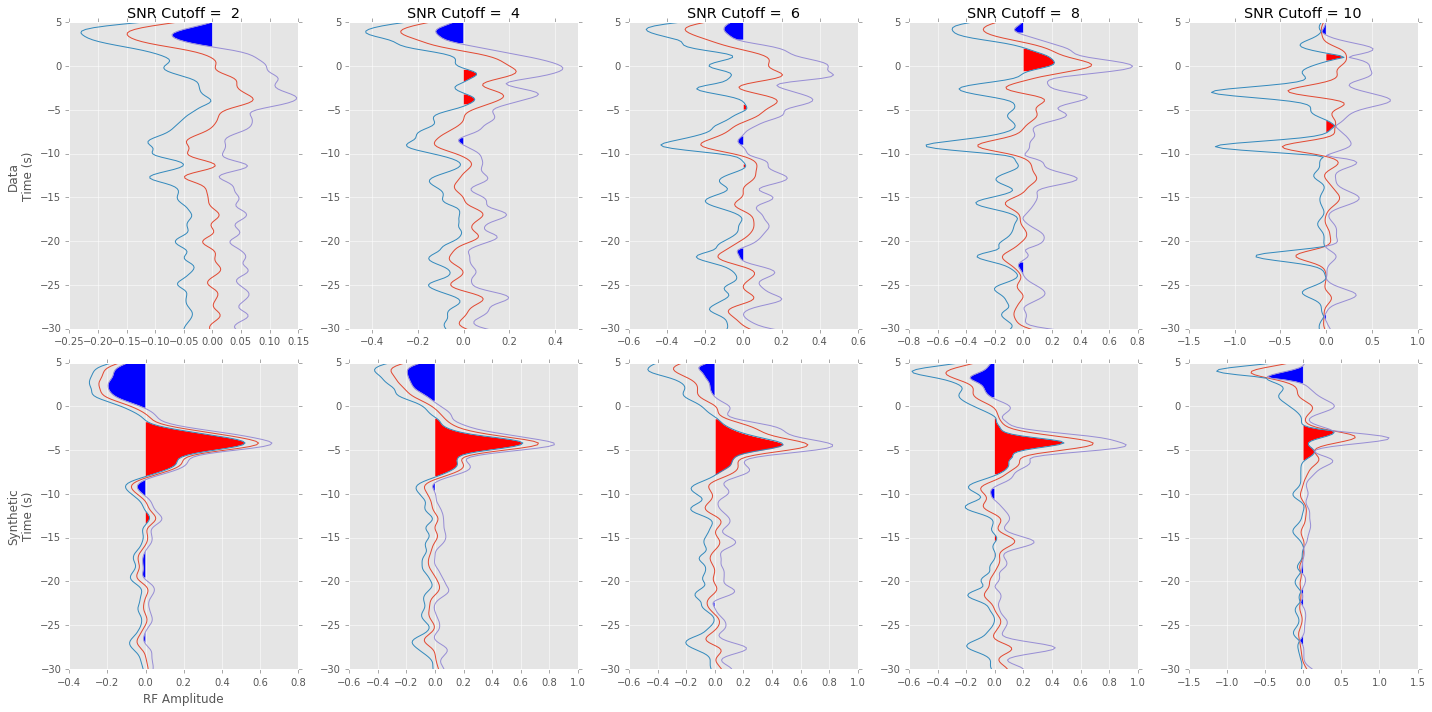

In [9]:
from numpy import nanmean, nanmedian, nanstd
from numpy.random import choice

#times, RF = ETMTM(P,D,TB,NT,dt, tag='data', nalphas=20, Poverlap=Poverlap, win_len=win_len)

#nrfs = len(cat2)
#nrfs = 329

minsnrs = arange(2, 12, 2)

#rbin_sn = rbin_s.copy() + randn(rbin_s.shape[0],rbin_s.shape[1],rbin_s.shape[2])*0.05

for iplt, minsnr in enumerate(minsnrs):
    for irow, rbin0 in enumerate([rbin, rbin_s]):
        
        snr_sample = arange(len(cat2))[mbin2[0,:]>minsnr]
        
        nrfs = len(snr_sample)
        
        rbin1=rbin0[0,snr_sample,:]
        
        nboot = 500

        bbin = zeros(nboot*len(RF)).reshape(nboot, len(RF))

        for iboot in range(nboot):
            random_sample = choice(range(nrfs), nrfs, replace=True)
            bbin[iboot,:] = nanmean(rbin1[random_sample,:len(RF)],axis=0)

        plt.figure(1,figsize=(20,10))
        
        if irow == 0:
            plt.subplot(2,len(minsnrs),iplt+1)
        else:
            plt.subplot(2,len(minsnrs),iplt+1+len(minsnrs))

        plt.plot(nanmean(bbin, axis=0), times)
        plt.plot(nanmean(bbin, axis=0)-2*nanstd(bbin, axis=0), times)
        plt.plot(nanmean(bbin, axis=0)+2*nanstd(bbin, axis=0), times)

        plt.fill_betweenx(times,0,nanmean(bbin, axis=0)-2*nanstd(bbin, axis=0),where = nanmedian(bbin, axis=0)-2*nanstd(bbin, axis=0)>0.0,facecolor='r')
        plt.fill_betweenx(times,0,nanmean(bbin, axis=0)+2*nanstd(bbin, axis=0),where = nanmedian(bbin, axis=0)+2*nanstd(bbin, axis=0)<0.0,facecolor='b')
        #plt.plot(P)
        plt.ylim(-30,5)
        if irow == 0:
            plt.title('SNR Cutoff = %2d' % (minsnr) )

plt.subplot(2,len(minsnrs),1)
plt.ylabel('Data\nTime (s)')
plt.subplot(2,len(minsnrs),1+len(minsnrs))
plt.ylabel('Synthetic\nTime (s)')
plt.xlabel('RF Amplitude')

#plt.ylabel('Time (s)')
#plt.xlabel('RF Amplitude')
    
plt.tight_layout()
plt.savefig('PAYG_SNR.eps')

(array([ 526.,   45.,   22.,   22.,   14.,    1.,    2.,    1.,    1.,    2.]),
 array([  12.  ,   39.36,   66.72,   94.08,  121.44,  148.8 ,  176.16,
         203.52,  230.88,  258.24,  285.6 ]),
 <a list of 10 Patch objects>)

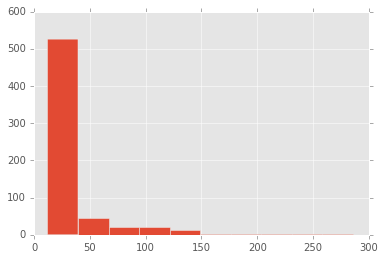

In [10]:
tmp=[]
for ievt, evt in enumerate(cat2):
    elat=evt.preferred_origin().latitude
    elon=evt.preferred_origin().longitude
    edep=evt.preferred_origin().depth/1000.0
    delm, az, baz = gps2dist_azimuth(elat, elon, slat, slon)
    deldeg = delm/1000./111.11
    tmp.append(edep)
    
plt.hist(tmp)

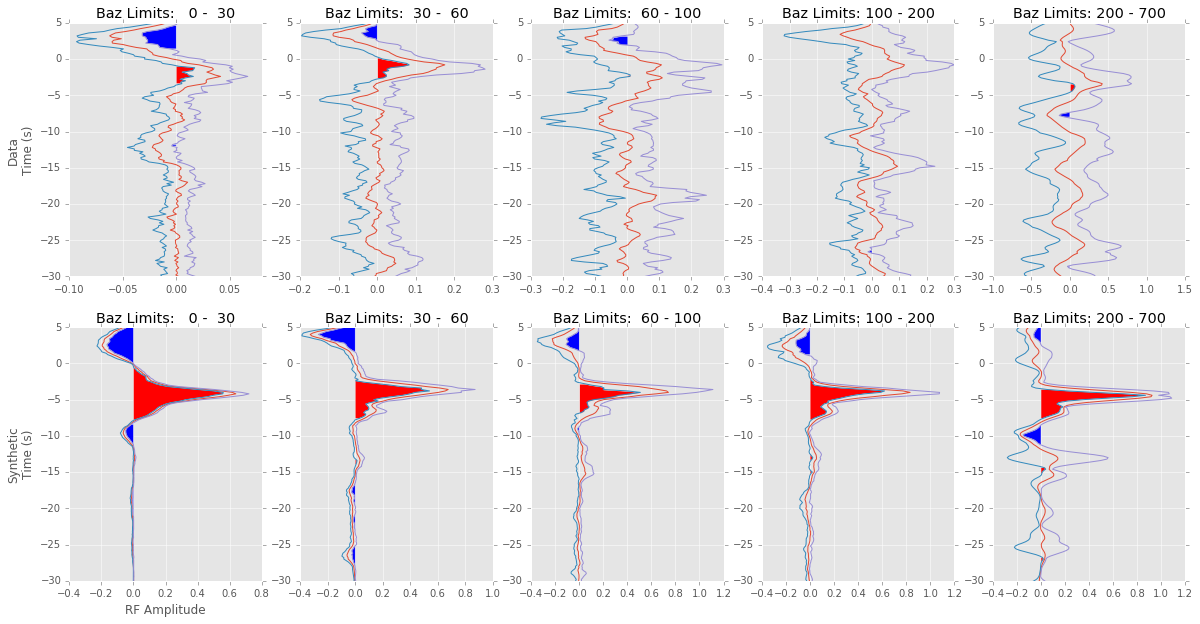

In [12]:
from numpy import nanmean, nanmedian, nanstd, array, shape
from numpy.random import choice

#times, RF = IDRF(P,D,dt)


depthranges = [(0,30),(30,60),(60,100),(100,200),(200,700)]

iplt = 4

for iplt, depthrange in enumerate(depthranges):
    for irow, rbin0 in enumerate([rbin, rbin_s]):
        
        dmin, dmax = depthrange[0], depthrange[1]

        slic = array(array(tmp) > dmin) & array(array(tmp) < dmax)

        #print(dmin, dmax, len(slic))

        nboot = 100

        bbin = zeros(nboot*len(RF)).reshape(nboot, len(RF))

        rbin2 = rbin0[0,slic,:len(RF)]
        nrf,_ = shape(rbin2)

        for iboot in range(nboot):

            random_sample = choice(range(nrf), nrf, replace=True)

            #print(nrf, len(random_sample))

            bbin[iboot,:] = nanmedian(rbin2[random_sample,:],axis=0)

        plt.figure(1,figsize=(20,10))
        
        if irow == 0:
            plt.subplot(2,len(depthranges),iplt+1)
        else:
            plt.subplot(2,len(depthranges),iplt+1+len(depthranges))

        plt.plot(nanmean(bbin, axis=0), times)
        plt.plot(nanmean(bbin, axis=0)-2*nanstd(bbin, axis=0), times)
        plt.plot(nanmean(bbin, axis=0)+2*nanstd(bbin, axis=0), times)

        plt.fill_betweenx(times,0,nanmean(bbin, axis=0)-2*nanstd(bbin, axis=0),where = nanmean(bbin, axis=0)-2*nanstd(bbin, axis=0)>0.0,facecolor='r')
        plt.fill_betweenx(times,0,nanmean(bbin, axis=0)+2*nanstd(bbin, axis=0),where = nanmean(bbin, axis=0)+2*nanstd(bbin, axis=0)<0.0,facecolor='b')
        #plt.plot(P)
        plt.ylim(-30,5)
        #plt.xlim(-0.3,0.3)
        plt.title('Baz Limits: %3d - %3d' % (dmin, dmax))

plt.subplot(2,len(depthranges),1)
plt.ylabel('Data\nTime (s)')
        
plt.subplot(2,len(depthranges),1+len(depthranges))
plt.ylabel('Synthetic\nTime (s)')
plt.xlabel('RF Amplitude')
    
#plt.tight_layout()
plt.savefig('PAYG_baz_limted.eps')